<img src="images/Hotel-Booking.png" style="height: 600px;" align=left> 

In [319]:
# Importing neccesary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.datasets


import warnings
warnings.filterwarnings('ignore')

# A. Reading Dataset

In [320]:
# Load dataset

hoteldata= pd.read_csv("data/hotel_bookings.csv")
hoteldata.head(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,22/4/2015


In [321]:
print(hoteldata.shape)

(119390, 32)


In [322]:
# let's look at the statistical aspects of the dataframes
hoteldata.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [323]:
#checking datatypes
hoteldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### The dataset have 32 variables 
### Have both continuous and categorical variables
### One dependent categorical variable ('is_cancelled')

In [324]:
#check missing data (null) in dataset

no_data = pd.DataFrame({'No Data' : hoteldata.isna().sum(),'Percentage Null Values' : ((hoteldata.isna().sum()) / (hoteldata.shape[0]) * (100)).round(3)})
no_data

,No Data,Percentage Null Values
hotel,0,0.000
is_canceled,0,0.000
lead_time,0,0.000
arrival_date_year,0,0.000
arrival_date_month,0,0.000
arrival_date_week_number,0,0.000
arrival_date_day_of_month,0,0.000
stays_in_weekend_nights,0,0.000
stays_in_week_nights,0,0.000
adults,0,0.000


### Total data is 119390
### Columns 'agent' & 'company'  have high null values which may effect the analysis. Both columns need to be remove
### Column 'country' has 488 rows with null values (0.41%) and column 'children' has 4 rows with null values (0.003%), both are negligible hence can also be remove

In [325]:
Choteldata = hoteldata.copy()
Choteldata

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [326]:

Choteldata = Choteldata.drop(['agent','company'],axis=1)
Choteldata = Choteldata.dropna(axis = 0)


In [327]:
print(Choteldata.shape)

(118898, 30)


### Rename Columns for better understanding

In [328]:
Choteldata.columns = ['Hotel', 'Canceled', 'LeadTime', 'Arriving (Year)', 'Arriving (Month)', 'Arriving (Week)','Arriving Date', 'Stay Weekeend',
              'Stay Week', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'Channel','Repeat Guest', 'Previous Cancel',
              'Previous Book', 'BookRoomType','AssignRoomType', 'Change Booking', 'Deposit Type', 'Waiting Days', 
              'Customer Type', 'ADR','Park Space', 'Special Request','Reservation', 'Reservation Date']
Choteldata.head(15)

,Hotel,Canceled,LeadTime,Arriving (Year),Arriving (Month),Arriving (Week),Arriving Date,Stay Weekeend,Stay Week,Adults,...,AssignRoomType,Change Booking,Deposit Type,Waiting Days,Customer Type,ADR,Park Space,Special Request,Reservation,Reservation Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,22/4/2015


### Children/Babies must come to the hotel with their father/mother/family, so values for columns 'Adults', 'Children' & 'Babies' cannot be zero at the same time

### So the dataset need to be filter the rows which having zero for these 3 columns at the same time

In [329]:
# adults, babies and children cant be zero at same time

filter = (Choteldata.Children == 0) & (Choteldata.Adults == 0) & (Choteldata.Babies == 0)
FChoteldata = Choteldata[~filter]
FChoteldata.shape

(118728, 30)

# B) EDA

## What type of room that have high demand?

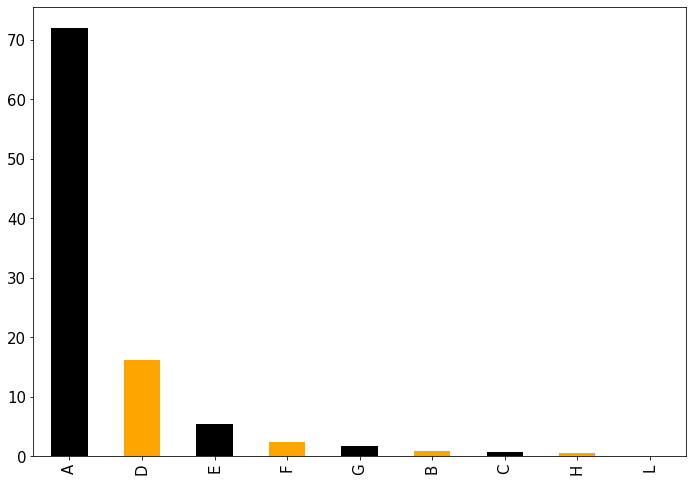

In [330]:
(FChoteldata.BookRoomType.value_counts(normalize=True)*100).plot.bar(color=['black','orange'],fontsize=15)

plt.show()

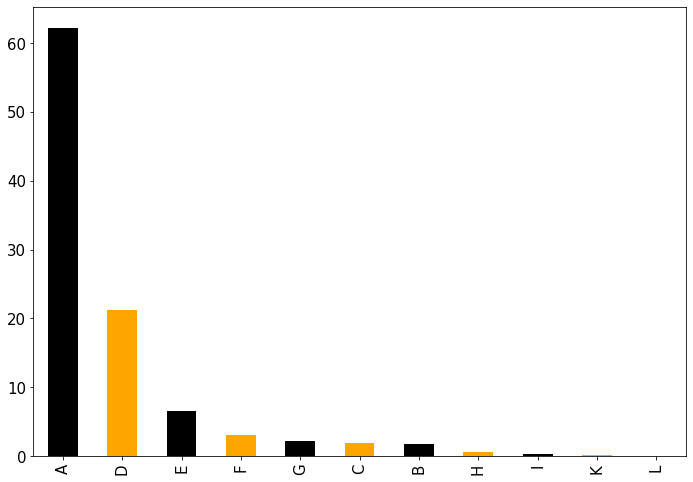

In [331]:
(FChoteldata.AssignRoomType.value_counts(normalize=True)*100).plot.bar(color=['black','orange'],fontsize=15)

plt.show()

### Room type A  becomes the first choice of visitors, followed by room type D

## Which type of hotel that have high demand?

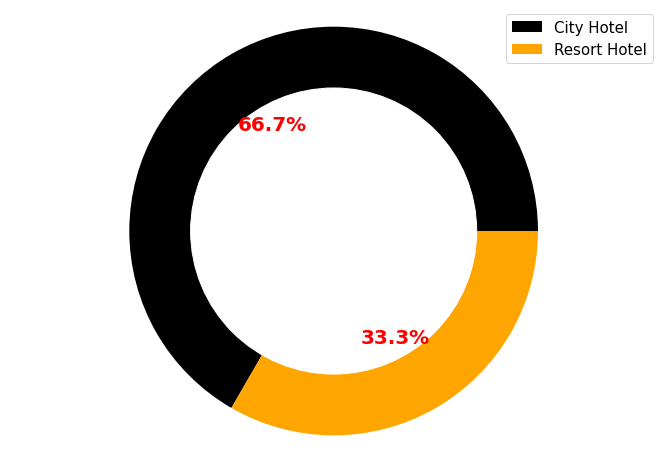

In [332]:
#Title & Percentage
FChoteldata.Hotel.value_counts().plot(kind='pie', labels=['',''],autopct='%1.1f%%', fontsize=20, colors=['black','orange'], textprops={'color':"r", 'weight':"bold"})

#Makewhite circle for donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')
plt.ylabel("")

plt.legend(labels=['City Hotel','Resort Hotel'], loc=1, fontsize=15)


### City Hotel are preferred by visitors than Resort Hotel

## What is the relationship between LeadTime and Cancelation rate?

Text(0.5, 1.0, 'Arriving (Year), Leadtime and Cancelations')

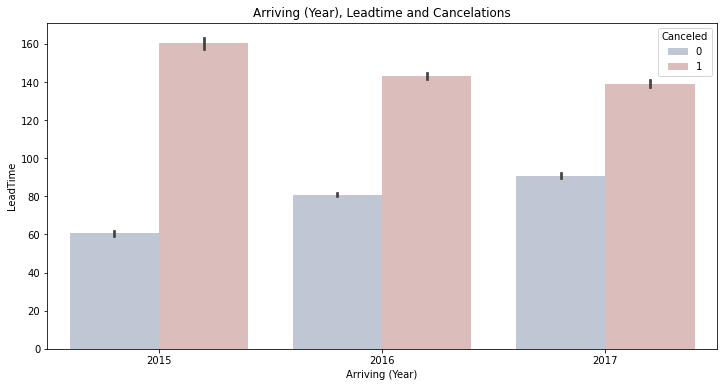

In [333]:
plt.figure(figsize=(12,6))
sns.barplot(x='Arriving (Year)', y='LeadTime',hue='Canceled', data= FChoteldata, palette='vlag')
plt.title('Arriving (Year), Leadtime and Cancelations')

### For all the 3 years, bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled

## When is the best time of the year to book a hotel room?


### Lets explore the total visitors and the prices
### 1) Total Visitors (Resort Hotel vs City Hotel)

In [334]:
data_resort_hotel = FChoteldata[(FChoteldata['Hotel'] == 'Resort Hotel') & (FChoteldata['Canceled'] == 0)]
data_city_hotel = FChoteldata[(FChoteldata['Hotel'] == 'City Hotel') & (FChoteldata['Canceled'] == 0)]

In [335]:
resort_visitors = data_resort_hotel['Arriving (Month)'].value_counts().reset_index()
resort_visitors.columns=['Month','no of guests']
resort_visitors

,Month,no of guests
0,August,3237
1,July,3110
2,October,2528
3,May,2523
4,April,2518
5,March,2517
6,February,2253
7,September,2077
8,June,2026
9,December,1970


In [336]:
#sorting the months
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [337]:
import sort_dataframeby_monthorweek as sd

def sort_month(FChoteldata, column_name):
    return sd.Sort_Dataframeby_Month(FChoteldata, column_name)

In [338]:
sort_resort_visitors = sort_month(resort_visitors, 'Month')
sort_resort_visitors

,Month,no of guests
0,January,1812
1,February,2253
2,March,2517
3,April,2518
4,May,2523
5,June,2026
6,July,3110
7,August,3237
8,September,2077
9,October,2528


In [339]:
city_visitors = data_city_hotel['Arriving (Month)'].value_counts().reset_index()
city_visitors.columns=['Month','no of guests']
sort_city_visitors = sort_month(city_visitors, 'Month')
sort_city_visitors

,Month,no of guests
0,January,2249
1,February,3051
2,March,4049
3,April,4010
4,May,4568
5,June,4358
6,July,4770
7,August,5367
8,September,4283
9,October,4326


In [340]:
total_visitors = sort_resort_visitors.merge(sort_city_visitors,on='Month')
total_visitors.columns=['Month','No of visitors in resort','No of visitors in city hotel']
sort_total_visitors = sort_month(total_visitors, 'Month')
sort_total_visitors

,Month,No of visitors in resort,No of visitors in city hotel
0,January,1812,2249
1,February,2253,3051
2,March,2517,4049
3,April,2518,4010
4,May,2523,4568
5,June,2026,4358
6,July,3110,4770
7,August,3237,5367
8,September,2077,4283
9,October,2528,4326


In [341]:
from matplotlib import rcParams

rcParams['figure.figsize']=11.7,8.27



<AxesSubplot:xlabel='Month'>

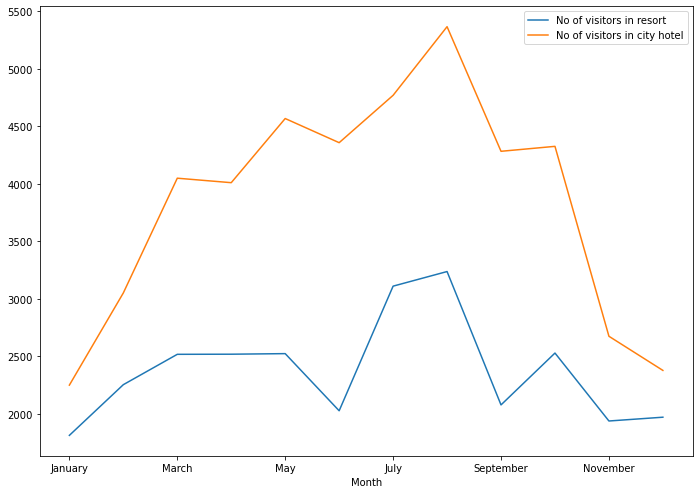

In [342]:
sort_total_visitors.plot(x='Month', y=['No of visitors in resort','No of visitors in city hotel'], kind='line')

### If the best time indicator is less visitors, the best time to book City Hotel is January, November & December while the best time to book Resort Hotel is January, June, September, November & December

### 2) Prices (Resort Hotel vs City Hotel)

In [343]:
resort_prices = data_resort_hotel.groupby(['Arriving (Month)'])['ADR'].mean().reset_index().round(2)

sort_resort_prices = sort_month(resort_prices, 'Arriving (Month)')
sort_resort_prices

,Arriving (Month),ADR
0,January,48.99
1,February,54.47
2,March,57.41
3,April,76.18
4,May,76.73
5,June,108.13
6,July,150.48
7,August,181.35
8,September,96.29
9,October,61.93


In [344]:
city_prices = data_city_hotel.groupby(['Arriving (Month)'])['ADR'].mean().reset_index().round(2)

sort_city_prices = sort_month(city_prices, 'Arriving (Month)')
sort_city_prices

,Arriving (Month),ADR
0,January,82.33
1,February,86.52
2,March,90.66
3,April,111.96
4,May,120.67
5,June,117.87
6,July,115.82
7,August,118.67
8,September,112.78
9,October,102.00


In [345]:
total_prices = sort_resort_prices.merge(sort_city_prices,on='Arriving (Month)')
total_prices.columns=['Arriving (Month)','Prices in resort hotel','Prices in city hotel']
sort_total_prices = sort_month(total_prices, 'Arriving (Month)')
sort_total_prices

,Arriving (Month),Prices in resort hotel,Prices in city hotel
0,January,48.99,82.33
1,February,54.47,86.52
2,March,57.41,90.66
3,April,76.18,111.96
4,May,76.73,120.67
5,June,108.13,117.87
6,July,150.48,115.82
7,August,181.35,118.67
8,September,96.29,112.78
9,October,61.93,102.00


<AxesSubplot:xlabel='Arriving (Month)'>

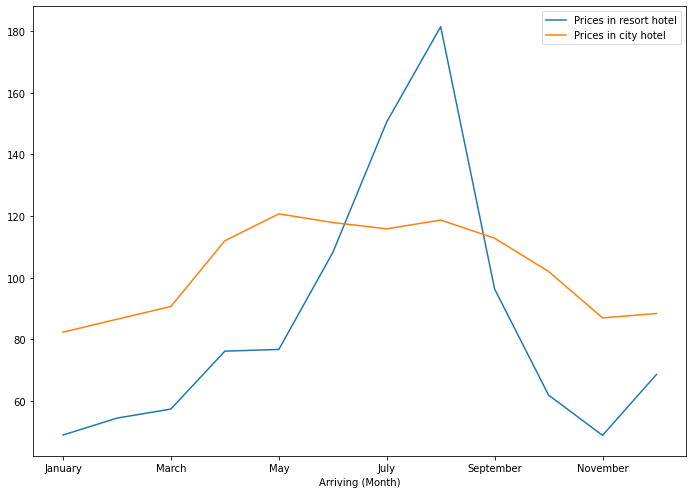

In [346]:
sort_total_prices.plot(x='Arriving (Month)', y=['Prices in resort hotel','Prices in city hotel'], kind='line')

### If the best time indicator is the best rate, the best time to book City Hotel is January, February, March, Novermber & December while the best time to book Resort Hotel is January, February, March & November

## What is the optimal length of stay in order to get the best daily rate?

Need to filter column 'ADR' with zero values, it is not possible for people to stay at hotel with free of charges

In [347]:
data_resort_hotel = FChoteldata[(FChoteldata['Hotel'] == 'Resort Hotel') & (FChoteldata['Canceled'] == 0)& (FChoteldata['ADR'] != 0)]
data_city_hotel = FChoteldata[(FChoteldata['Hotel'] == 'City Hotel') & (FChoteldata['Canceled'] == 0)& (FChoteldata['ADR'] != 0)]

In [348]:
data_resort_hotel

,Hotel,Canceled,LeadTime,Arriving (Year),Arriving (Month),Arriving (Week),Arriving Date,Stay Weekeend,Stay Week,Adults,...,AssignRoomType,Change Booking,Deposit Type,Waiting Days,Customer Type,ADR,Park Space,Special Request,Reservation,Reservation Date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,A,1,No Deposit,0,Transient,89.75,0,0,Check-Out,10/9/2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,E,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,10/9/2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out,12/9/2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out,14/9/2017


### Optimal length of stay at Resort Hotel is 56 days with best daily rate 28.79 
#### ADR 0 is  negligible, people cannot stay at hotel for free

In [349]:
data_resort_hotel['total_nights'] = data_resort_hotel['Stay Weekeend'] + data_resort_hotel['Stay Week']
data_resort_hotel.groupby(['total_nights'])['ADR'].mean().round(2)

total_nights
1      75.53
2      92.10
3      95.10
4      96.33
5     110.69
6     121.94
7      97.56
8     108.75
9     110.96
10    101.82
11    101.02
12    104.32
13    100.52
14     87.52
15     91.56
16     89.28
17     86.80
18     93.04
19     68.91
21     68.23
22     73.34
23     67.87
25     55.07
28     57.08
29     68.20
30    115.00
35     39.88
38      0.26
42     35.52
45     42.11
56     28.79
Name: ADR, dtype: float64

### Optimal length of stay at City Hotel is 21 days with best daily rate 75.65  

In [350]:
data_city_hotel['total_nights'] = data_city_hotel['Stay Weekeend'] + data_city_hotel['Stay Week']
data_city_hotel.groupby(['total_nights'])['ADR'].mean().round(2)

total_nights
1     109.98
2     107.99
3     108.29
4     106.90
5     107.48
6     109.45
7     108.89
8     107.90
9     115.97
10    104.91
11    107.84
12    101.52
13    108.00
14    111.67
15     96.52
16    122.46
17    113.51
18    110.00
19     85.00
20     87.70
21     75.65
22     95.20
23    170.00
24    106.00
34     93.00
Name: ADR, dtype: float64

# C) Data Pre Processing

In [351]:
FChoteldata.head()

,Hotel,Canceled,LeadTime,Arriving (Year),Arriving (Month),Arriving (Week),Arriving Date,Stay Weekeend,Stay Week,Adults,...,AssignRoomType,Change Booking,Deposit Type,Waiting Days,Customer Type,ADR,Park Space,Special Request,Reservation,Reservation Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,3/7/2015


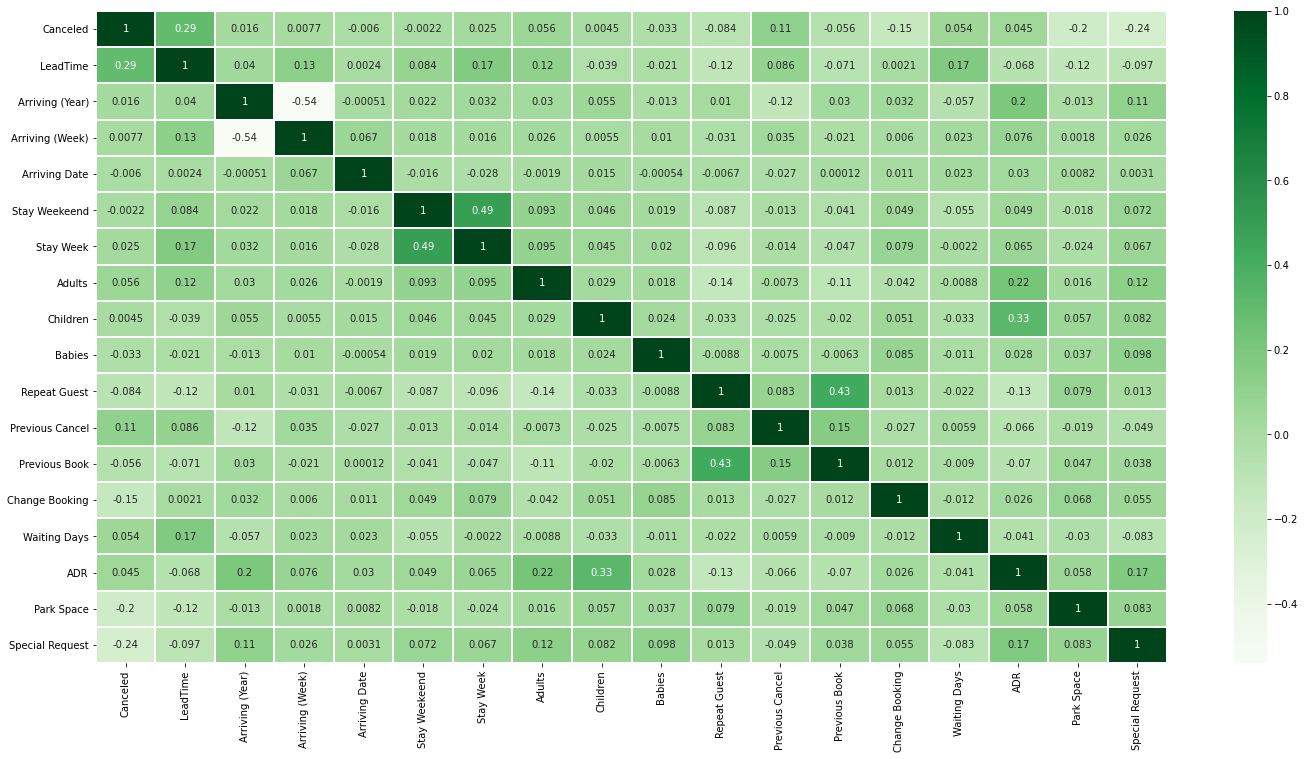

In [352]:
plt.figure(figsize = (24, 12))
df =FChoteldata.copy()
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1,  cmap="Greens")
plt.show()

In [353]:
correlation = df.corr()['Canceled'].abs().sort_values(ascending = False)
correlation

Canceled           1.000000
LeadTime           0.291602
Special Request    0.235923
Park Space         0.195012
Change Booking     0.145136
Previous Cancel    0.109909
Repeat Guest       0.084141
Adults             0.056130
Previous Book      0.055502
Waiting Days       0.054113
ADR                0.044885
Babies             0.032605
Stay Week          0.024803
Arriving (Year)    0.016408
Arriving (Week)    0.007664
Arriving Date      0.006002
Children           0.004535
Stay Weekeend      0.002223
Name: Canceled, dtype: float64

In [354]:
# dropping columns that are not useful

unuse_col = ['Arriving Date', 'LeadTime','Reservation', 'Country']

df.drop(unuse_col, axis = 1, inplace = True)

In [355]:
df.head()

,Hotel,Canceled,Arriving (Year),Arriving (Month),Arriving (Week),Stay Weekeend,Stay Week,Adults,Children,Babies,...,BookRoomType,AssignRoomType,Change Booking,Deposit Type,Waiting Days,Customer Type,ADR,Park Space,Special Request,Reservation Date
0,Resort Hotel,0,2015,July,27,0,0,2,0.0,0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,1/7/2015
1,Resort Hotel,0,2015,July,27,0,0,2,0.0,0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,1/7/2015
2,Resort Hotel,0,2015,July,27,0,1,1,0.0,0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,2/7/2015
3,Resort Hotel,0,2015,July,27,0,1,1,0.0,0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,2/7/2015
4,Resort Hotel,0,2015,July,27,0,2,2,0.0,0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,3/7/2015


In [356]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df.columns if FChoteldata[col].dtype == 'O']
cat_cols

['Hotel',
 'Arriving (Month)',
 'Meal',
 'Segment',
 'Channel',
 'BookRoomType',
 'AssignRoomType',
 'Deposit Type',
 'Customer Type',
 'Reservation Date']

In [357]:
cat_df = df[cat_cols]
cat_df.head()

,Hotel,Arriving (Month),Meal,Segment,Channel,BookRoomType,AssignRoomType,Deposit Type,Customer Type,Reservation Date
0,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient,1/7/2015
1,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient,1/7/2015
2,Resort Hotel,July,BB,Direct,Direct,A,C,No Deposit,Transient,2/7/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,A,No Deposit,Transient,2/7/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,A,No Deposit,Transient,3/7/2015


In [358]:
cat_df['Reservation Date'] = pd.to_datetime(cat_df['Reservation Date'])

cat_df['year'] = cat_df['Reservation Date'].dt.year
cat_df['month'] = cat_df['Reservation Date'].dt.month
cat_df['day'] = cat_df['Reservation Date'].dt.day

In [359]:
cat_df.drop(['Reservation Date','Arriving (Month)'] , axis = 1, inplace = True)

In [360]:
cat_df.head()

,Hotel,Meal,Segment,Channel,BookRoomType,AssignRoomType,Deposit Type,Customer Type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient,2015,1,7
1,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient,2015,1,7
2,Resort Hotel,BB,Direct,Direct,A,C,No Deposit,Transient,2015,2,7
3,Resort Hotel,BB,Corporate,Corporate,A,A,No Deposit,Transient,2015,2,7
4,Resort Hotel,BB,Online TA,TA/TO,A,A,No Deposit,Transient,2015,3,7


In [361]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

Hotel: 
['Resort Hotel' 'City Hotel']

Meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

Segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']

Channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

BookRoomType: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

AssignRoomType: 
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']

Deposit Type: 
['No Deposit' 'Refundable' 'Non Refund']

Customer Type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 1  2  3  6  4  5  7  8 11  9 12 10]

day: 
[ 7  5 22 23 16 29 19 18  6 13 26 17 15 20 14 30 28 25 21 27 24  3  4  8
 31  9  1 10 11 12  2]



In [362]:
# encoding categorical variables

cat_df['Hotel'] = cat_df['Hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['Meal'] = cat_df['Meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['Segment'] = cat_df['Segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['Channel'] = cat_df['Channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['BookRoomType'] = cat_df['BookRoomType'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['AssignRoomType'] = cat_df['AssignRoomType'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'I': 6,
                                                                   'B': 7, 'H': 8,'L': 8,'K': 8})

cat_df['Deposit Type'] = cat_df['Deposit Type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['Customer Type'] = cat_df['Customer Type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})



In [363]:
cat_df.head()

,Hotel,Meal,Segment,Channel,BookRoomType,AssignRoomType,Deposit Type,Customer Type,year,month,day
0,0,0,0,0,0,0,0,0,0,1,7
1,0,0,0,0,0,0,0,0,0,1,7
2,0,0,0,0,1,0,0,0,0,2,7
3,0,0,1,1,1,1,0,0,0,2,7
4,0,0,2,2,1,1,0,0,0,3,7


In [364]:
num_df = FChoteldata.drop(columns = cat_cols, axis = 1)
num_df.drop('Canceled', axis = 1, inplace = True)
num_df

,LeadTime,Arriving (Year),Arriving (Week),Arriving Date,Stay Weekeend,Stay Week,Adults,Children,Babies,Country,Repeat Guest,Previous Cancel,Previous Book,Change Booking,Waiting Days,ADR,Park Space,Special Request,Reservation
0,342,2015,27,1,0,0,2,0.0,0,PRT,0,0,0,3,0,0.00,0,0,Check-Out
1,737,2015,27,1,0,0,2,0.0,0,PRT,0,0,0,4,0,0.00,0,0,Check-Out
2,7,2015,27,1,0,1,1,0.0,0,GBR,0,0,0,0,0,75.00,0,0,Check-Out
3,13,2015,27,1,0,1,1,0.0,0,GBR,0,0,0,0,0,75.00,0,0,Check-Out
4,14,2015,27,1,0,2,2,0.0,0,GBR,0,0,0,0,0,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,BEL,0,0,0,0,0,96.14,0,0,Check-Out
119386,102,2017,35,31,2,5,3,0.0,0,FRA,0,0,0,0,0,225.43,0,2,Check-Out
119387,34,2017,35,31,2,5,2,0.0,0,DEU,0,0,0,0,0,157.71,0,4,Check-Out
119388,109,2017,35,31,2,5,2,0.0,0,GBR,0,0,0,0,0,104.40,0,0,Check-Out


In [365]:
num_df.var()

LeadTime           11430.877927
Arriving (Year)        0.500495
Arriving (Week)      184.589232
Arriving Date         77.095636
Stay Weekeend          0.985502
Stay Week              3.568657
Adults                 0.330277
Children               0.159551
Babies                 0.009496
Repeat Guest           0.030595
Previous Cancel        0.716426
Previous Book          2.206115
Change Booking         0.408211
Waiting Days         310.924966
ADR                 2539.111940
Park Space             0.059648
Special Request        0.628436
dtype: float64

In [366]:
# normalizing numerical variables

num_df['LeadTime'] = np.log(num_df['LeadTime'] + 1)
num_df['Arriving (Week)'] = np.log(num_df['Arriving (Week)'] + 1)
num_df['Arriving Date'] = np.log(num_df['Arriving Date'] + 1)
num_df['Waiting Days'] = np.log(num_df['Waiting Days'] + 1)
num_df['ADR'] = np.log(num_df['ADR'] + 1)


In [367]:
num_df.var()

LeadTime           2.565930
Arriving (Year)    0.500495
Arriving (Week)    0.439759
Arriving Date      0.506159
Stay Weekeend      0.985502
Stay Week          3.568657
Adults             0.330277
Children           0.159551
Babies             0.009496
Repeat Guest       0.030595
Previous Cancel    0.716426
Previous Book      2.206115
Change Booking     0.408211
Waiting Days       0.505987
ADR                0.513431
Park Space         0.059648
Special Request    0.628436
dtype: float64

In [368]:
num_df['ADR'] = num_df['ADR'].fillna(value = num_df['ADR'].mean())

In [369]:
num_df.drop('Country', axis = 1, inplace = True)
num_df.drop('Reservation', axis = 1, inplace = True)
num_df

,LeadTime,Arriving (Year),Arriving (Week),Arriving Date,Stay Weekeend,Stay Week,Adults,Children,Babies,Repeat Guest,Previous Cancel,Previous Book,Change Booking,Waiting Days,ADR,Park Space,Special Request
0,5.837730,2015,3.332205,0.693147,0,0,2,0.0,0,0,0,0,3,0.0,0.000000,0,0
1,6.603944,2015,3.332205,0.693147,0,0,2,0.0,0,0,0,0,4,0.0,0.000000,0,0
2,2.079442,2015,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0,0.0,4.330733,0,0
3,2.639057,2015,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0,0.0,4.330733,0,0
4,2.708050,2015,3.332205,0.693147,0,2,2,0.0,0,0,0,0,0,0.0,4.595120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,3.178054,2017,3.583519,3.433987,2,5,2,0.0,0,0,0,0,0,0.0,4.576153,0,0
119386,4.634729,2017,3.583519,3.465736,2,5,3,0.0,0,0,0,0,0,0.0,5.422436,0,2
119387,3.555348,2017,3.583519,3.465736,2,5,2,0.0,0,0,0,0,0,0.0,5.067079,0,4
119388,4.700480,2017,3.583519,3.465736,2,5,2,0.0,0,0,0,0,0,0.0,4.657763,0,0


In [370]:
X = pd.concat([cat_df, num_df], axis = 1)
y = df['Canceled']

In [371]:
X.shape, y.shape

((118728, 28), (118728,))

In [372]:
# splitting data into training set and test set
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7,stratify=y)

In [373]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(89046, 28)
(89046,)
(29682, 28)
(29682,)


# D) Model Building

### 1)KNN

In [374]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [375]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Accuracy for k = 5 on test data: {} \n'.format(knn.score(X_test, y_test)))

Accuracy for k = 5 on test data: 0.8991307863351526 



### 2) Decision Tree

In [376]:
from sklearn.tree import DecisionTreeClassifier
dt_param_grid = {'max_depth': np.arange(1, 10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                        dt_param_grid, cv=5, scoring = 'roc_auc')
dt_grid.fit(X_train, y_train)
print('DecosionTree Best parameters', dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
print('DecosionTree best score = ',dt_grid.best_score_ )


DecosionTree Best parameters {'max_depth': 9}
DecosionTree best score =  0.8770353031498107


### 3) Random Forest Classifier

In [377]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)
y_pred_rd_clf = rd_clf.predict(X_test)
acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")

Accuracy Score of Random Forest is : 0.947611346944276


### I got accuracy score of 94.7% for cancelation prediction